# Introdução

Fonte: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## Descrição das colunas

**age**: (Age of the patient in years)

**sex**: (Male/Female)

**cp**: chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

**trestbps**: resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

**chol**: (serum cholesterol in mg/dl)

**fbs**: (if fasting blood sugar > 120 mg/dl)

**restecg**: (resting electrocardiographic results): [normal, stt abnormality, lv hypertrophy]

**thalach**: maximum heart rate achieved

**exang**: exercise-induced angina (True/ False)

**oldpeak**: ST depression induced by exercise relative to rest

**slope**: the slope of the peak exercise ST segment

**ca**: number of major vessels (0-3) colored by fluoroscopy

**thal**: [normal; fixed defect; reversible defect]

**num**: the predicted attribute


## Comentários Iniciais

O dataset fornecido pelo professor já veio com o procedo de *Feature Engineering* executado

# Bicliotecas e Funções

In [197]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Código

In [198]:
df = pd.read_csv('https://raw.githubusercontent.com/KValim/Projetcs/main/FIAP/deep%20learning%20I/heart_disease_UCI/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [199]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Correlação

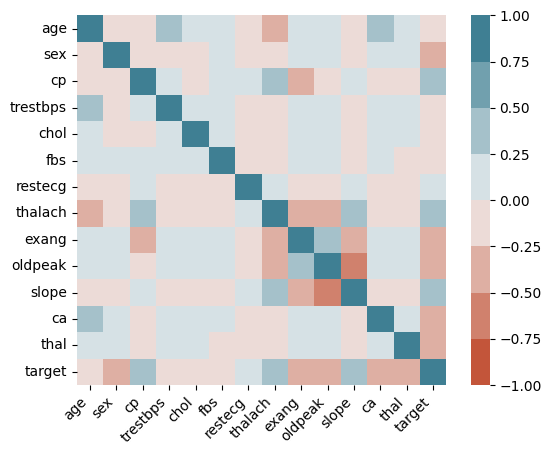

In [201]:
import seaborn as sns

corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=8),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Nenhuma correlação expressiva em relação a variável target

## Split Train Test

split it into training and testing sets

In [133]:
# Split the data into X (features) and y (target)
X = df.drop("target", axis=1)
y = df["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We will then standardize the data using StandardScaler

In [134]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
epochs = 100

## Modelo 1

Next, we will build our MLP neural network using Keras. We will start by defining the model as a Sequential model, and then adding two hidden layers with 64 and 32 units respectively

In [136]:
# Define the model
model = Sequential()

# Add the hidden layers
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))

Finally, we will add the output layer with a sigmoid activation function, and compile the model using the Adam optimizer and binary crossentropy loss

In [137]:
# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [138]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 64)                896       
                                                                 
 dense_44 (Dense)            (None, 32)                2080      
                                                                 
 dense_45 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


To train the model, we will use the fit method, passing in our training data and labels, and specifying the number of epochs and the batch size

In [139]:
# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32)

Epoch 1/100
8/8 [==============================] - 0s 997us/step - loss: 0.6620 - accuracy: 0.6116
Epoch 2/100
8/8 [==============================] - 0s 997us/step - loss: 0.5832 - accuracy: 0.7975
Epoch 3/100
8/8 [==============================] - 0s 997us/step - loss: 0.5210 - accuracy: 0.8099
Epoch 4/100
8/8 [==============================] - 0s 997us/step - loss: 0.4713 - accuracy: 0.8388
Epoch 5/100
8/8 [==============================] - 0s 997us/step - loss: 0.4291 - accuracy: 0.8430
Epoch 6/100
8/8 [==============================] - 0s 997us/step - loss: 0.3970 - accuracy: 0.8471
Epoch 7/100
8/8 [==============================] - 0s 997us/step - loss: 0.3697 - accuracy: 0.8760
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.8802
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8802
Epoch 10/100
8/8 [==============================] - 0s 997us/step - loss: 0.3204 - accuracy: 0.8802
Epoch 11/100


Finally, we can evaluate the model on the testing data using the evaluate method

In [140]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)


2/2 [==============================] - 0s 998us/step - loss: 0.8930 - accuracy: 0.7869
Loss: 0.8930461406707764
Accuracy: 0.7868852615356445


This should give us a full code for classifying healthy or not healthy using an MLP neural network on the UCI Heart Disease dataset

## Modelo 2
A recurrent neural network (RNN) with one LSTM layer

In [141]:
from tensorflow.keras.layers import LSTM

# Define the model
model = Sequential()

# Add the LSTM layer
model.add(LSTM(units=32, input_shape=(X_train.shape[1], 1)))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [142]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 32)                4352      
                                                                 
 dense_46 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [143]:
# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32)

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.6871 - accuracy: 0.6322
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.6281
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.6364
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6604 - accuracy: 0.6405
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6533 - accuracy: 0.6405
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6468 - accuracy: 0.6446
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6400 - accuracy: 0.6446
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.6446
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6294 - accuracy: 0.6529
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6242 - accuracy: 0.6653
Epoch 11/100
8/8 [===========

In [144]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)


2/2 [==============================] - 0s 3ms/step - loss: 0.7245 - accuracy: 0.6557
Loss: 0.7245498299598694
Accuracy: 0.6557376980781555


## Modelo 3
A hybrid neural network with one convolutional layer and one LSTM layer

In [145]:
from tensorflow.keras.layers import Conv1D, LSTM

# Define the model
model = Sequential()

# Add the convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add the LSTM layer
model.add(LSTM(units=32))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [146]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 11, 32)            128       
                                                                 
 lstm_21 (LSTM)              (None, 32)                8320      
                                                                 
 dense_47 (Dense)            (None, 1)                 33        
                                                                 
Total params: 8,481
Trainable params: 8,481
Non-trainable params: 0
_________________________________________________________________


In [147]:
# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32)

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.6951 - accuracy: 0.5455
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.5537
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6751 - accuracy: 0.6281
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6658 - accuracy: 0.6529
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6548 - accuracy: 0.6777
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6427 - accuracy: 0.6942
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6265 - accuracy: 0.6860
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6102 - accuracy: 0.7273
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5843 - accuracy: 0.7397
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5612 - accuracy: 0.7273
Epoch 11/100
8/8 [===========

In [148]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)


2/2 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7541
Loss: 0.5034451484680176
Accuracy: 0.7540983557701111


**Nh=Ns(α∗(Ni+No))**


Ni = number of input neurons.

No = number of output neurons.

Ns = number of samples in training data set.

α = an arbitrary scaling factor usually 2-10.

## Modelo 4
A deep neural network (DNN) with three hidden layers

In [149]:
# Define the model
model = Sequential()

# Add the hidden layers
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [150]:
# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32)

Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7136 - accuracy: 0.4917
Epoch 2/100
8/8 [==============================] - 0s 855us/step - loss: 0.6488 - accuracy: 0.6446
Epoch 3/100
8/8 [==============================] - 0s 855us/step - loss: 0.5958 - accuracy: 0.7562
Epoch 4/100
8/8 [==============================] - 0s 855us/step - loss: 0.5465 - accuracy: 0.7893
Epoch 5/100
8/8 [==============================] - 0s 855us/step - loss: 0.4987 - accuracy: 0.8140
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4561 - accuracy: 0.8347
Epoch 7/100
8/8 [==============================] - 0s 997us/step - loss: 0.4167 - accuracy: 0.8347
Epoch 8/100
8/8 [==============================] - 0s 858us/step - loss: 0.3862 - accuracy: 0.8471
Epoch 9/100
8/8 [==============================] - 0s 855us/step - loss: 0.3599 - accuracy: 0.8512
Epoch 10/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3430 - accuracy: 0.8512
Epoch 11/100
8/

In [151]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)


2/2 [==============================] - 0s 2ms/step - loss: 1.0592 - accuracy: 0.7869
Loss: 1.0591744184494019
Accuracy: 0.7868852615356445


## Modelo 5
A recurrent neural network (RNN) with two LSTM layers:

In [152]:
from tensorflow.keras.layers import LSTM

# Define the model
model = Sequential()

# Add the LSTM layers
model.add(LSTM(units=32, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(LSTM(units=32))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [153]:
# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32)

Epoch 1/100
8/8 [==============================] - 3s 7ms/step - loss: 0.6852 - accuracy: 0.5950
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6757 - accuracy: 0.5909
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6690 - accuracy: 0.5744
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6614 - accuracy: 0.5702
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6572 - accuracy: 0.5868
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6074
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6429 - accuracy: 0.6281
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6340 - accuracy: 0.6446
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6242 - accuracy: 0.6860
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6103 - accuracy: 0.6901
Epoch 11/100
8/8 [===========

In [154]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)


2/2 [==============================] - 1s 3ms/step - loss: 0.8930 - accuracy: 0.6557
Loss: 0.8929719924926758
Accuracy: 0.6557376980781555


##  Modelo 6
A hybrid neural network with one convolutional layer, one LSTM layer, and one dense layer

In [155]:
from tensorflow.keras.layers import Conv1D, LSTM, Dense

# Define the model
model = Sequential()

# Add the convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add the LSTM layer
model.add(LSTM(units=32))

# Add the dense layer
model.add(Dense(units=16, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [156]:
# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32)

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.6847 - accuracy: 0.5496
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6710 - accuracy: 0.6529
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6589 - accuracy: 0.6612
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6440 - accuracy: 0.6612
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6287 - accuracy: 0.7149
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6121 - accuracy: 0.7190
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5905 - accuracy: 0.7149
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5649 - accuracy: 0.7355
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5417 - accuracy: 0.7438
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5123 - accuracy: 0.7645
Epoch 11/100
8/8 [===========

In [157]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)


2/2 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.7869
Loss: 0.6587808132171631
Accuracy: 0.7868852615356445
